In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

Accurate prediction of default risk in lending has been a crucial theme for banks and other lenders for over a century. Modern-day availability of large datasets and open source data, together with advances in computational and algorithmic data analytics techniques, have renewed interest in this risk prediction task.

P2P lending is defined as the practice of lending to individuals or businesses through an online platform that matches lenders with borrowers. 

As an example of application of logistic regression we consider data on peer-to-peer loan defaults. The data are a subset of those available in https://royalsocietypublishing.org/doi/full/10.1098/rsos.191649, which have also been analyzedin the same. The format of the data for each loan is as follows: 

- loan amnt: The amount of loan requested.
- term: The term length of the loan in months.
- installment: Monthly installment amount.

- empl_length: employment length 
- dti: Debt-to-Income ratio, a measure used to evaluate the borrower's ability to manage debt.
- open_acc: The number of open credit lines.
- revol_util: Credit utilization rate, which is the amount of credit the borrower is using relative to all available revolving credit.
- total_acc: The total number of credit lines the borrower has.
- log_annual_inc: Logarithm of the borrower's annual income.
- fico_score: FICO credit score of the borrower.
- log_revol_bal: Logarithm of the revolving balance, likely related to credit card balance.
- charged_off: A binary variable indicating whether the loan has defaulted (1) or not (0).

The last variable "charged_off" is the output we wish to predict given the features associated with the other variables in the table.

# default = 1
# non-default = 0

In [7]:
# change with your path
file_path = "/Users/sabrina.aufiero/Desktop/COMP0050 Machine Learning with Applications in Finance/Week 4_Logistic Regression/Logistic regression files-20240125/LogisticRegressionPython/data.csv"
data = pd.read_csv(file_path)
display(data)

,loan_amnt,term,installment,emp_length,dti,open_acc,revol_util,total_acc,mort_acc,log_annual_inc,fico_score,log_revol_bal,charged_off
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33950.0,36.0,1331.78,3.0,15.99,4.0,60.5,17.0,4.0,5.096913,712.0,3.803252,1.0
2,9000.0,36.0,303.21,6.0,37.25,7.0,76.2,26.0,5.0,4.698979,662.0,4.086146,0.0
3,3000.0,36.0,106.20,2.0,35.52,14.0,74.5,42.0,0.0,4.477136,672.0,4.062243,0.0
4,28000.0,36.0,879.88,10.0,12.43,12.0,80.8,47.0,3.0,5.439334,697.0,4.750370,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,10000.0,36.0,337.81,2.0,14.80,8.0,36.3,12.0,0.0,4.653222,717.0,3.810501,0.0
10200,8000.0,36.0,283.44,9.0,4.51,5.0,35.8,8.0,1.0,5.060702,667.0,3.045714,0.0
10201,28000.0,36.0,976.27,10.0,23.52,7.0,81.2,21.0,8.0,5.079185,702.0,4.676584,0.0
10202,19675.0,36.0,731.10,4.0,19.34,14.0,44.0,30.0,0.0,4.838855,667.0,4.100577,1.0


In [8]:
#Data Cleaning
data_clean = data.dropna()
display(data_clean)

,loan_amnt,term,installment,emp_length,dti,open_acc,revol_util,total_acc,mort_acc,log_annual_inc,fico_score,log_revol_bal,charged_off
1,33950.0,36.0,1331.78,3.0,15.99,4.0,60.5,17.0,4.0,5.096913,712.0,3.803252,1.0
2,9000.0,36.0,303.21,6.0,37.25,7.0,76.2,26.0,5.0,4.698979,662.0,4.086146,0.0
3,3000.0,36.0,106.20,2.0,35.52,14.0,74.5,42.0,0.0,4.477136,672.0,4.062243,0.0
4,28000.0,36.0,879.88,10.0,12.43,12.0,80.8,47.0,3.0,5.439334,697.0,4.750370,0.0
5,25000.0,36.0,873.88,9.0,7.33,8.0,22.3,10.0,1.0,4.916459,712.0,3.685921,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,10000.0,36.0,337.81,2.0,14.80,8.0,36.3,12.0,0.0,4.653222,717.0,3.810501,0.0
10200,8000.0,36.0,283.44,9.0,4.51,5.0,35.8,8.0,1.0,5.060702,667.0,3.045714,0.0
10201,28000.0,36.0,976.27,10.0,23.52,7.0,81.2,21.0,8.0,5.079185,702.0,4.676584,0.0
10202,19675.0,36.0,731.10,4.0,19.34,14.0,44.0,30.0,0.0,4.838855,667.0,4.100577,1.0


In [9]:
statistics = data_clean.describe().round(1)
display(statistics)

,loan_amnt,term,installment,emp_length,dti,open_acc,revol_util,total_acc,mort_acc,log_annual_inc,fico_score,log_revol_bal,charged_off
count,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0,7810.0
mean,15878.3,41.4,518.8,5.6,14.7,10.5,45.5,23.2,1.7,4.9,702.7,3.8,0.3
std,9632.7,10.0,314.8,3.6,8.5,5.2,25.6,11.6,2.3,0.3,36.3,0.7,0.5
min,1000.0,36.0,31.3,0.0,0.0,1.0,0.0,3.0,0.0,3.8,662.0,0.0,0.0
25%,8000.0,36.0,278.8,2.0,8.1,7.0,24.9,15.0,0.0,4.7,677.0,3.6,0.0
50%,14175.0,36.0,450.5,5.0,13.8,9.0,45.0,21.0,1.0,4.9,692.0,3.9,0.0
75%,22000.0,36.0,704.9,10.0,20.4,13.0,65.8,30.0,3.0,5.0,722.0,4.2,1.0
max,40000.0,60.0,1569.1,10.0,57.5,71.0,137.8,118.0,37.0,6.7,847.5,6.0,1.0


In [10]:
# 70% training, 30% testing
X = data_clean.drop('charged_off', axis=1)
y = data_clean['charged_off']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In the paper, in order to simulate realistic results for the test set, the data were sectioned according to the date associated with the loan. 
Most recent loans were used as test set, while earlier loans were used to train the model. This simulates the human process of learning by experience. 
In order to obtain a common feature for the date of both accepted and rejected loans, the issue date (for accepted loans) and the application date (for rejected loans) were assimilated into one date feature.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The random_state parameter in functions like train_test_split is used to ensure reproducibility in machine learning processes by providing a fixed seed for the random number generator, allowing the same data splits to be generated every time the code runs.

In [12]:
# Training the logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

We need to first make predictions on your test set and then compare these predictions to the actual values.

In [13]:
y_pred = model.predict(X_test)

Key metrics to assess the performance of a classification model:

#### Precision (or Specificity)
Indicates the proportion of positive identifications that were actually correct. It's calculated as TP / (TP + FP), where TP is the number of true positives, and FP is the number of false positives.

### Accuracy 
Accuracy is calculated as the total number of correct predictions divided by the total number of predictions.

#### Recall
Indicates the proportion of actual positive cases that were correctly identified. It's calculated as TP / (TP + FN), where FN is the number of false negatives.

#### F1-Score
It's the harmonic mean of precision and recall. It provides a balance between precision and recall and can be particularly useful in situations with imbalanced classes. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

In [14]:
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

Precision: 0.6491329076380893


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7059325650874947


In [16]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.1953232462173315


In [17]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.2918807810894142


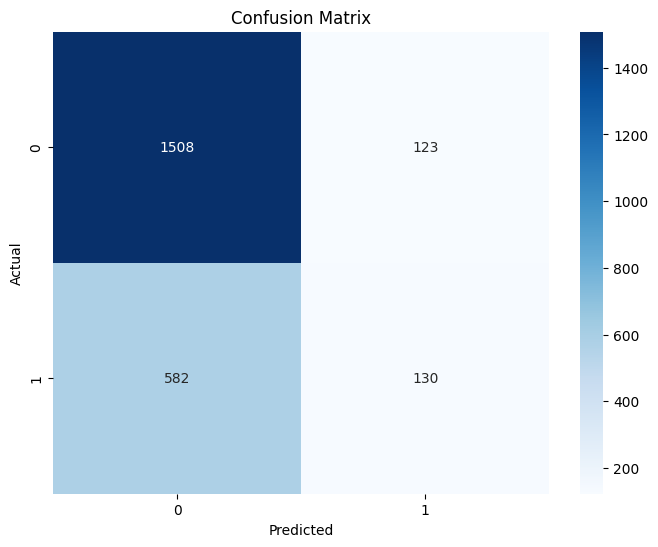

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The model exhibits a strong bias towards predicting the class 0 (= non-default), accurately identifying most of these cases. 

However, it significantly underperforms in recognizing the class 1 (= default), leading to a high incidence of false negatives, where many instances of the actual class 1 are incorrectly predicted as class 0. 

## REMEMBER:

## default = 1
## non-default = 0

### This phenomenon is particularly worrying in our analysis though, as the cost of lending to an unworthy borrower is high!